In [65]:
import pandas as pd
a = pd.read_csv('NationalNames.csv')

def task1():
    return a.head(8)
task1()





,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [20]:
def task2():
    return a.tail(8)
task2()

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [7]:
def task3():
    return a.columns
task3()

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [8]:
def task5():
    return a['Name'].nunique
task5()

<bound method IndexOpsMixin.nunique of 0               Mary
1               Anna
2               Emma
3          Elizabeth
4             Minnie
             ...    
1825428       Zykeem
1825429       Zymeer
1825430      Zymiere
1825431        Zyran
1825432        Zyrin
Name: Name, Length: 1825433, dtype: object>

In [9]:
def task10():
    return a.groupby('Year')['Name'].nunique()
task10()

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

In [12]:
def task11():
    a = task10().idxmax()
    b = task10().max()
    return int(a),int(b)  
task11()

(2008, 32488)

In [23]:
def task12():
    x = 2008
    b = a[a['Year'] == x]
    y = b.groupby('Name')['Count'].sum().idxmax()
    return y
task12()

'Jacob'

In [38]:
def task13():
    x = a[(a['Name'] == 'Jacob') & (a['Gender'] == 'F')]
    y = x.loc[x['Count'].idxmax(),'Year']
    b = x[x['Count'] == x['Count'].max()]
    return b
task13()

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


In [74]:
def task14():
    b = a.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
    b = b[b['Gender'] == 2]
    x = b.groupby('Year').size().reset_index(name='Gender_neutral_names')
    x = x[x['Gender_neutral_names'] == x['Gender_neutral_names'].max()]
    return x
task14()

,Year,Gender_neutral_names
128,2008,2557


In [75]:
def task15():
    b = a.groupby('Year')['Count'].sum()
    return b
task15()

Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64

In [81]:
def task16():
    b = a.groupby('Year').size().reset_index(name='Count')
    x = b.loc[b['Count'].idxmax(), 'Year']
    return int(x)
task16()

2008

In [95]:
def task17():
    b = a.groupby(['Year', 'Gender'])['Count'].sum().unstack()
    return b
task17()


Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


In [97]:
def task18():
    b = a.groupby(['Year', 'Gender'])['Count'].sum().unstack()
    c = (b['F'] > b['M']).sum()
    return int(c)
task18()

54

In [100]:
def task21():
    b = a[(a['Name'] == 'Barbara') & (a['Gender'] == 'M')]['Count'].sum()
    return int(b)
task21()

4139

In [107]:
def task22():
    b = a['Year'].nunique()
    return b
task22()

135

In [124]:
def task23():
    b = a.groupby(['Name', 'Year'])['Gender'].nunique().reset_index()
    c = b[b['Gender'] == 2]
    d = c.groupby('Name')['Year'].nunique().reset_index()
    f = a['Year'].nunique()
    x = d[d['Year'] == f]
    x = x[['Name']].reset_index(drop=True)
    return x
task23()


,Name
0,Francis
1,James
2,Jean
3,Jesse
4,Jessie
5,John
6,Johnnie
7,Joseph
8,Lee
9,Leslie


In [128]:
def task24():
    b = a.groupby('Name').size().reset_index(name='Total_Count')
    c = b['Total_Count'].min()
    d = b[b['Total_Count'] == c]
    f =d.loc[d['Total_Count'].idxmax()]
    x = f"Наиболее популярное из непопулярных имен - это {f['Name']}. Им называли {f['Total_Count']} раз"
    return x
task24()

'Наиболее популярное из непопулярных имен - это Aabid. Им называли 1 раз'

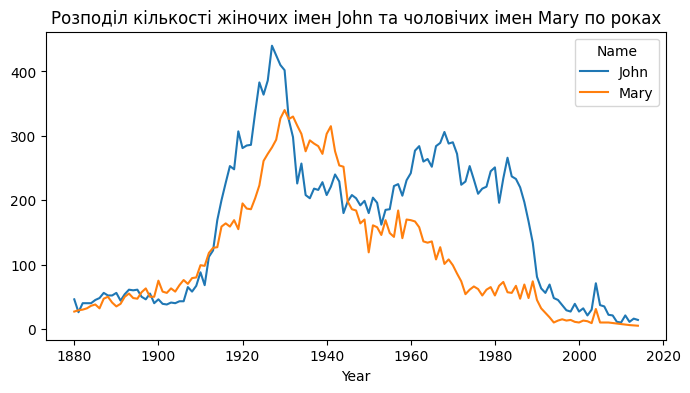

In [120]:
import matplotlib.pyplot as plt

def task26():
    b = a[(a['Name'] == 'John') & (a['Gender'] == 'F')]
    d = a[(a['Name'] == 'Mary') & (a['Gender'] == 'M')]
    c = b.groupby('Year')['Count'].sum()
    f = d.groupby('Year')['Count'].sum()
    plt.figure(figsize=(10, 5))
    plt.plot(c.index, c.values, label='John')
    plt.plot(f.index, f.values, label='Mary')
    plt.title('Розподіл кількості жіночих імен John та чоловічих імен Mary по роках')
    plt.xlabel('Year')
    plt.legend(title='Name')
    plt.show()
task26()
